In [149]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier

In [121]:
df1 = pd.read_csv('./final_merged.csv')
df1 = df1.drop(['Unnamed: 0'] , axis=1)

In [122]:
df1['DelayClass'] = df1['DepDelayMinutes'].apply(lambda x: 1 if x!=0 else 0)

In [123]:
df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'time', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity',
       'date', 'airport', 'DelayClass'],
      dtype='object')

In [124]:
df1=df1.dropna()

In [125]:
df1 = df1.drop(['FlightDate','Origin','Dest','time','date','airport','ArrTime','ArrDel15','ArrDelayMinutes',
       'DepTime', 'DepDelayMinutes', 'DepDel15'],axis=1)

In [126]:
df1

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,...,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,DelayClass
0,2017,3,9,25,12478,13204,1346,1642,12.0,67.0,...,0.0,1017.0,14.0,10.0,116.0,76.0,76.0,117.0,74.0,0
1,2017,3,9,25,12478,13930,902,1045,6.0,66.0,...,0.0,1018.0,8.0,10.0,116.0,70.0,70.0,145.0,90.0,0
2,2017,3,9,25,13930,12478,2044,2359,10.0,63.0,...,0.0,1013.0,12.0,10.0,113.0,85.0,85.0,151.0,48.0,1
3,2017,3,9,25,11057,12478,1952,2157,11.0,64.0,...,0.0,1013.0,18.0,10.0,116.0,80.0,80.0,41.0,59.0,0
4,2017,3,9,25,12478,11057,1658,1914,14.0,66.0,...,0.0,1017.0,17.0,10.0,143.0,72.0,72.0,134.0,82.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,13204,13930,1130,1330,16.0,56.0,...,1.9,1017.0,20.0,6.0,302.0,61.0,60.0,331.0,87.0,0
1877292,2016,1,1,3,14107,11292,2110,2259,17.0,38.0,...,0.0,1013.0,27.0,10.0,122.0,62.0,62.0,76.0,42.0,1
1877293,2016,1,1,3,11292,14107,1830,2024,4.0,26.0,...,0.0,1029.0,8.0,0.0,260.0,26.0,24.0,158.0,100.0,1
1877294,2016,1,1,3,13930,13204,925,1312,19.0,21.0,...,0.0,1022.0,28.0,10.0,122.0,24.0,12.0,333.0,89.0,1


In [127]:
cor= df1.corr() 
cor

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,...,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,DelayClass
Year,1.000000,-0.001482,-0.002123,0.000229,0.000413,0.000245,0.001934,0.000027,0.027998,-0.017579,...,0.009171,-0.043726,0.040949,0.057806,-0.022994,-0.011376,0.003672,0.000174,-0.043741,-0.016817
Quarter,-0.001482,1.000000,0.970570,0.010586,0.002955,0.003532,-0.003222,-0.003149,-0.098277,0.134336,...,-0.038070,0.037999,-0.093351,0.119100,-0.087895,0.153333,0.149413,-0.046475,-0.054573,-0.020482
Month,-0.002123,0.970570,1.000000,0.010398,0.002982,0.003583,-0.002821,-0.003825,-0.094867,0.123628,...,-0.040719,0.043222,-0.090576,0.120283,-0.088409,0.142851,0.138489,-0.047825,-0.053722,-0.020575
DayofMonth,0.000229,0.010586,0.010398,1.000000,0.000303,0.000310,-0.000143,-0.001545,0.009261,0.018220,...,-0.002196,-0.033402,0.006058,0.024988,-0.009631,0.016581,0.016114,0.001036,-0.001323,-0.005709
OriginAirportID,0.000413,0.002955,0.002982,0.000303,1.000000,-0.026355,-0.052992,-0.021444,-0.040186,-0.018118,...,-0.029471,-0.057966,-0.045199,-0.019767,-0.026933,-0.050995,-0.047370,0.011149,0.098838,0.002408
DestAirportID,0.000245,0.003532,0.003583,0.000310,-0.026355,1.000000,0.067229,0.008753,0.006616,-0.057240,...,-0.010468,-0.029394,0.002146,0.014307,-0.018354,-0.029965,-0.028656,0.029591,-0.025567,0.028415
CRSDepTime,0.001934,-0.003222,-0.002821,-0.000143,-0.052992,0.067229,1.000000,0.535206,0.174511,0.035480,...,0.036494,-0.077309,0.124090,0.113659,0.015472,0.164287,0.162883,0.054194,-0.208309,0.174892
CRSArrTime,0.000027,-0.003149,-0.003825,-0.001545,-0.021444,0.008753,0.535206,1.000000,0.159443,0.003448,...,0.029463,-0.062992,0.089311,0.095796,0.011922,0.143195,0.133718,0.020320,-0.211462,0.135698
windspeedKmph,0.027998,-0.098277,-0.094867,0.009261,-0.040186,0.006616,0.174511,0.159443,1.000000,-0.055102,...,0.129822,-0.203971,0.911154,0.035715,0.117083,-0.097024,-0.127465,0.120536,0.014481,0.081886
DewPointF,-0.017579,0.134336,0.123628,0.018220,-0.018118,-0.057240,0.035480,0.003448,-0.055102,1.000000,...,0.142190,-0.199114,-0.066857,-0.077349,0.208527,0.651798,0.662072,-0.080022,0.350513,0.029591


<AxesSubplot:>

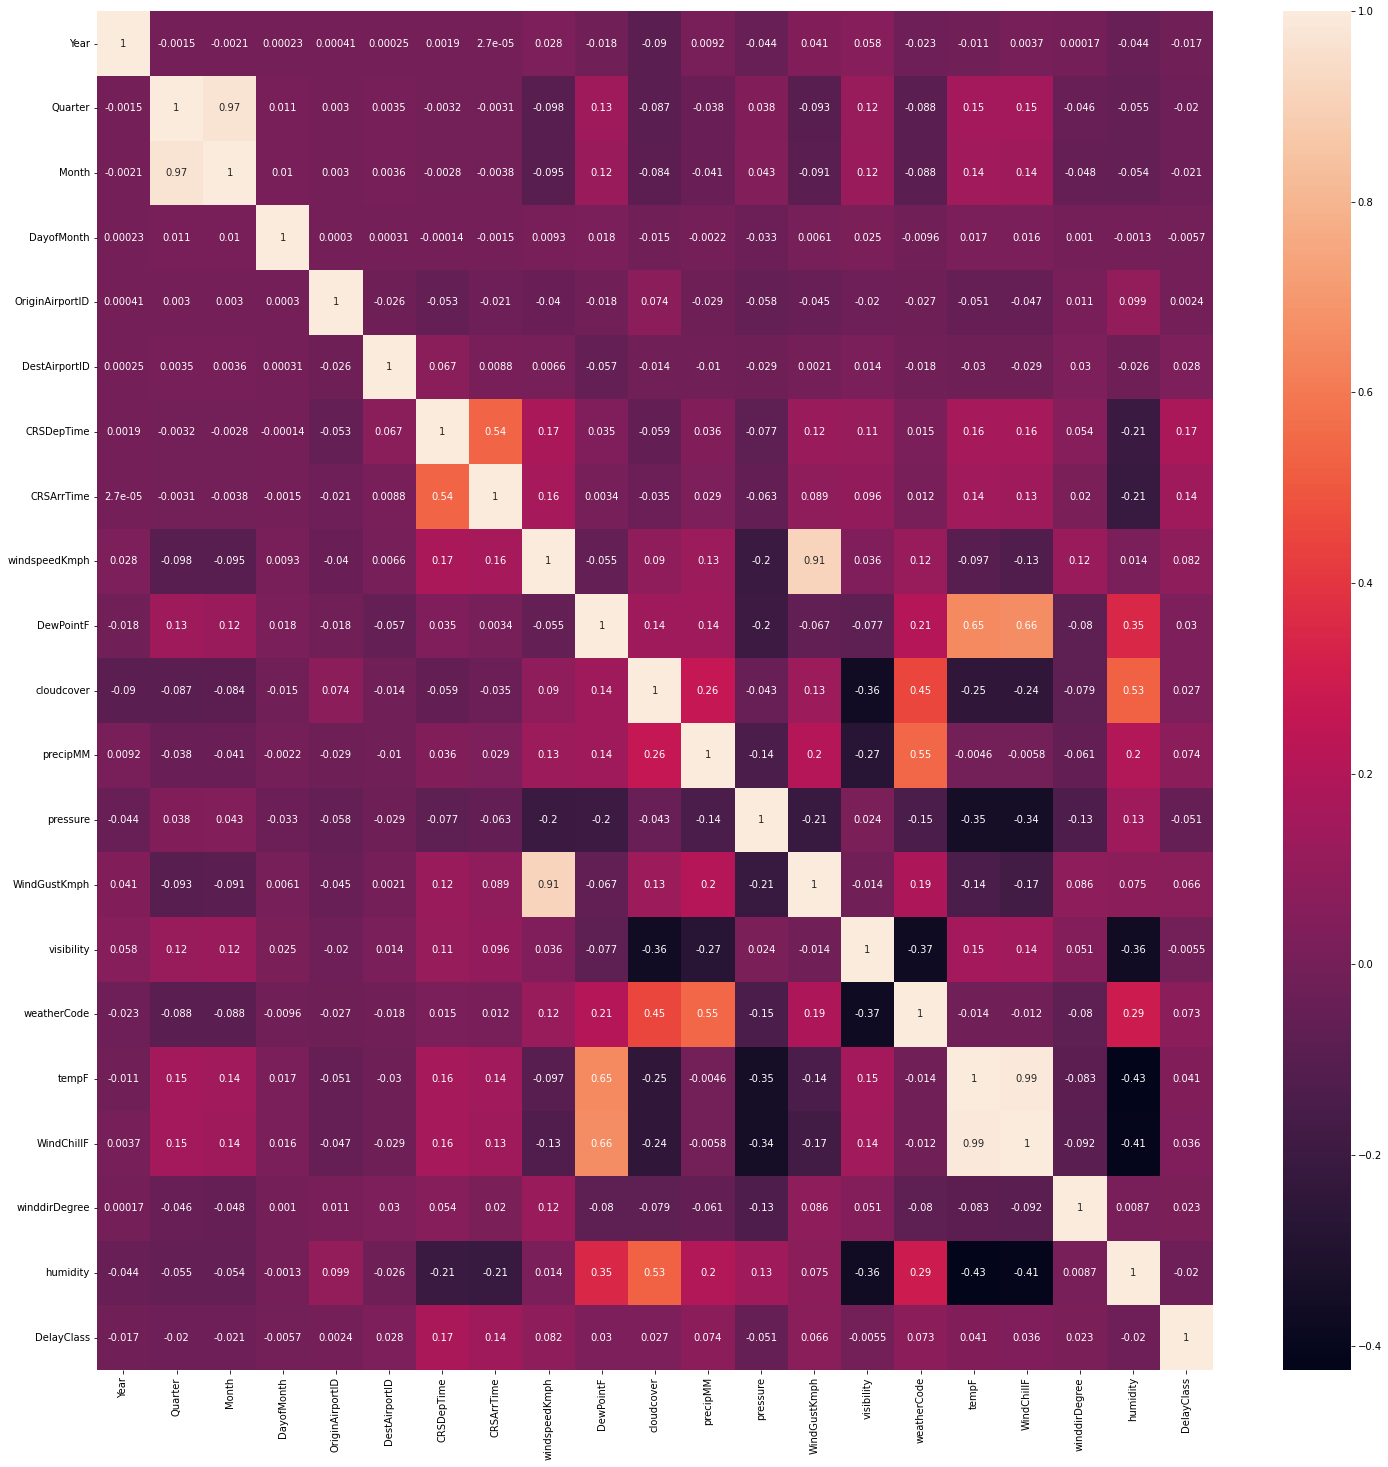

In [128]:
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True)

In [129]:
#month and quarter are positivly correlated
#windspeedkmph and windGustKmph are positivly correlated
#WindChillF and tempF are positivly correlated
df1 = df1.drop(['Quarter','WindGustKmph','WindChillF'],axis=1)

In [130]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity,DelayClass
0,2017,9,25,12478,13204,1346,1642,12.0,67.0,39.0,0.0,1017.0,10.0,116.0,76.0,117.0,74.0,0
1,2017,9,25,12478,13930,902,1045,6.0,66.0,55.0,0.0,1018.0,10.0,116.0,70.0,145.0,90.0,0
2,2017,9,25,13930,12478,2044,2359,10.0,63.0,5.0,0.0,1013.0,10.0,113.0,85.0,151.0,48.0,1
3,2017,9,25,11057,12478,1952,2157,11.0,64.0,32.0,0.0,1013.0,10.0,116.0,80.0,41.0,59.0,0
4,2017,9,25,12478,11057,1658,1914,14.0,66.0,47.0,0.0,1017.0,10.0,143.0,72.0,134.0,82.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,1330,16.0,56.0,100.0,1.9,1017.0,6.0,302.0,61.0,331.0,87.0,0
1877292,2016,1,3,14107,11292,2110,2259,17.0,38.0,99.0,0.0,1013.0,10.0,122.0,62.0,76.0,42.0,1
1877293,2016,1,3,11292,14107,1830,2024,4.0,26.0,100.0,0.0,1029.0,0.0,260.0,26.0,158.0,100.0,1
1877294,2016,1,3,13930,13204,925,1312,19.0,21.0,100.0,0.0,1022.0,10.0,122.0,24.0,333.0,89.0,1


In [131]:
X = df1.drop('DelayClass',axis=1)
y = df1['DelayClass']

In [132]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# FIXING CLASS IMBALANCE

In [133]:

y_train.value_counts()

0    894458
1    572756
Name: DelayClass, dtype: int64

# oversampling usign SMOTE

In [95]:
sm = SMOTE(random_state=10)
X_train , y_train = sm.fit_resample(X_train , y_train)

In [96]:
#after smote
y_train.value_counts()

0    894458
1    894458
Name: DelayClass, dtype: int64

# Logistic Regression with smote

In [101]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [109]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.5828535130478403

In [110]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63    223615
           1       0.47      0.60      0.53    143189

    accuracy                           0.58    366804
   macro avg       0.58      0.59      0.58    366804
weighted avg       0.61      0.58      0.59    366804



# DecisionTreeClassifier with smote

In [98]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.5909177653460704

In [112]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66    223615
           1       0.48      0.50      0.49    143189

    accuracy                           0.59    366804
   macro avg       0.57      0.57      0.57    366804
weighted avg       0.59      0.59      0.59    366804



# RandomForestClassifier with smote

In [104]:

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
res = model_RFC.predict(X_test)
model_RFC.score(X_test,y_test)

0.6384363311196171

In [114]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71    223615
           1       0.54      0.47      0.51    143189

    accuracy                           0.64    366804
   macro avg       0.62      0.61      0.61    366804
weighted avg       0.63      0.64      0.63    366804



# XGBOOST with smote

In [116]:
model_XG = XGBClassifier(n_estimators=500)
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [117]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76    223615
           1       0.63      0.42      0.50    143189

    accuracy                           0.68    366804
   macro avg       0.66      0.63      0.63    366804
weighted avg       0.67      0.68      0.66    366804



In [119]:
model_XG.score(X_test,y_test)

0.6761431173051548

# ExtraTreesClassifier with undersampling

In [ ]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

In [ ]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

In [ ]:
model_ETC.score(X_test,y_test)

# UNDERSAMPLING

In [134]:
undersample = NearMiss(version=3, n_neighbors_ver3=3)
X_train , y_train = undersample.fit_resample(X_train , y_train)

In [136]:
y_train.value_counts()

0    572756
1    572756
Name: DelayClass, dtype: int64

# RandomForestClassifier with undersampling

In [137]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
res = model_RFC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66    223615
           1       0.50      0.58      0.53    143189

    accuracy                           0.61    366804
   macro avg       0.60      0.60      0.60    366804
weighted avg       0.62      0.61      0.61    366804



In [139]:
model_RFC.score(X_test,y_test)

0.6081122343267794

# Logistic regression with undersampling

In [140]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [141]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.5870028680167064

In [142]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64    223615
           1       0.48      0.57      0.52    143189

    accuracy                           0.59    366804
   macro avg       0.58      0.58      0.58    366804
weighted avg       0.60      0.59      0.59    366804



# DecisionTreeClassifier with undersampling

In [143]:

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.5647457497737212

In [145]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61    223615
           1       0.45      0.57      0.50    143189

    accuracy                           0.56    366804
   macro avg       0.56      0.57      0.56    366804
weighted avg       0.59      0.56      0.57    366804



# XGBOOST WITH undersampling

In [146]:
model_XG = XGBClassifier(n_estimators=500)
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [147]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71    223615
           1       0.55      0.59      0.57    143189

    accuracy                           0.65    366804
   macro avg       0.63      0.64      0.64    366804
weighted avg       0.65      0.65      0.65    366804



In [148]:
model_XG.score(X_test,y_test)

0.6488587910709807

# ExtraTreesClassifier with undersampling

In [150]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [151]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64    223615
           1       0.48      0.57      0.52    143189

    accuracy                           0.59    366804
   macro avg       0.58      0.59      0.58    366804
weighted avg       0.61      0.59      0.60    366804



In [152]:
model_ETC.score(X_test,y_test)

0.5911031504563745